In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df = pd.read_csv('nyc-rolling-sales.csv')

In [11]:
#Displaying the first 5 rows of the dataset
df.head()

,N/O,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,19/07/2017 00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,14/12/2016 00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,09/12/2016 00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,23/09/2016 00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,17/11/2016 00:00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   N/O                             84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [14]:
# Check for missing values in each column of the dataset
missing_values_df = df.isnull().sum()
missing_values_df

N/O                               0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [24]:
for column in df.columns:
    print (column)

N/O
BOROUGH
NEIGHBORHOOD
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
BLOCK
LOT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
ZIP CODE
RESIDENTIAL UNITS
COMMERCIAL UNITS
TOTAL UNITS
LAND SQUARE FEET
GROSS SQUARE FEET
YEAR BUILT
TAX CLASS AT TIME OF SALE
BUILDING CLASS AT TIME OF SALE
SALE PRICE
SALE DATE


In [26]:
# Replace '-' with NaN in the Sale Price Column
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'],errors='coerce')
#Checking the other columns that might have '-'
hyphen_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        if '-' in unique_values or ' -  ' in unique_values:
            hyphen_columns.append(column)

In [27]:
hyphen_columns

['LAND SQUARE FEET', 'GROSS SQUARE FEET']

In [31]:
#Replacing hyphen columns with Nan
for column in hyphen_columns:
    df[column] = pd.to_numeric(df[column],errors='coerce')

In [33]:
missing_values_df_updated = df.isnull().sum()
missing_values_df_updated

N/O                                   0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [34]:
# Check unique values in 'EASE-MENT' column
unique_easement_values = df['EASE-MENT'].unique()

unique_easement_values


array([' '], dtype=object)

In [40]:
df.columns

Index(['N/O', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [42]:
# Convert 'SALE DATE' to datetime format
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [47]:
# Check the data types to confirm the conversion
df.dtypes

N/O                                        int64
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

In [48]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

duplicate_rows


0

In [49]:
# Columns to check for zero values
columns_to_check = ['SALE PRICE', 'YEAR BUILT', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

# Count zero values in the specified columns
zero_values = {}
for column in columns_to_check:
    zero_values[column] = (df[column] == 0).sum()

zero_values


{'SALE PRICE': 10228,
 'YEAR BUILT': 6970,
 'LAND SQUARE FEET': 10326,
 'GROSS SQUARE FEET': 11417}

In [50]:
# Replace zero values with NaN in the specified columns
for column in columns_to_check:
    df[column].replace(0, pd.NaT, inplace=True)

# Check updated missing values count
missing_values_after_zeros = df.isnull().sum()

missing_values_after_zeros


N/O                                   0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        24789
SALE DATE                             0
dtype: int64

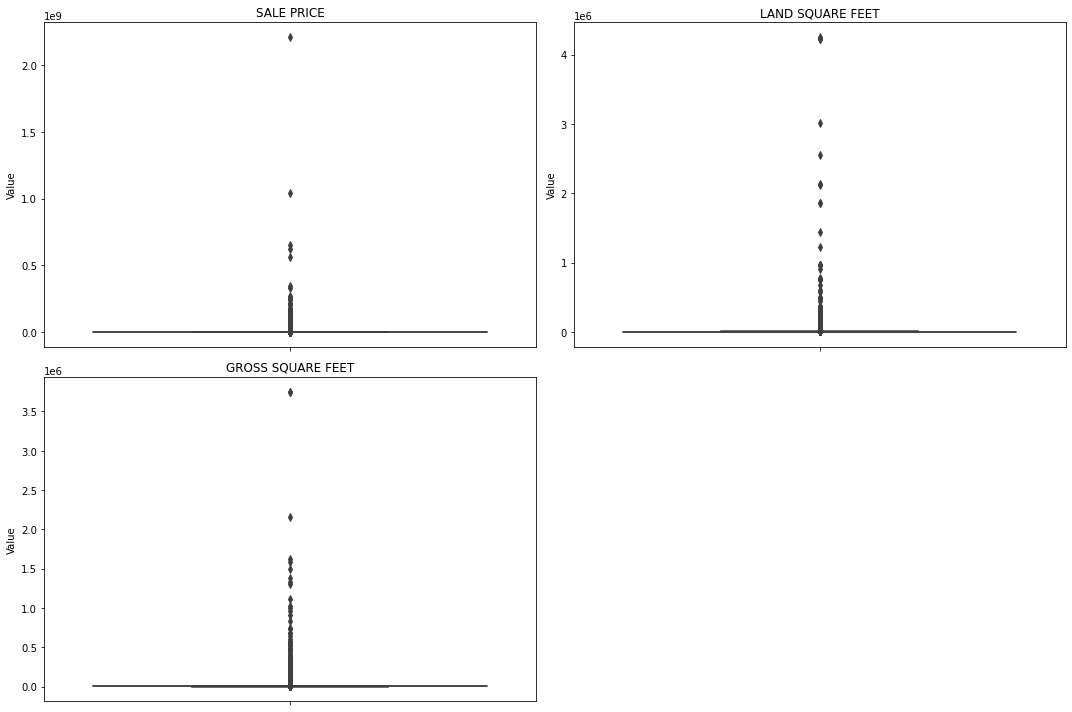

In [52]:
# Plot boxplots for selected columns after dropping NaN values
plt.figure(figsize=(15, 10))

for idx, column in enumerate(['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(y=df[column].dropna())
    plt.title(column)
    plt.ylabel('Value')
    plt.tight_layout()

plt.show()

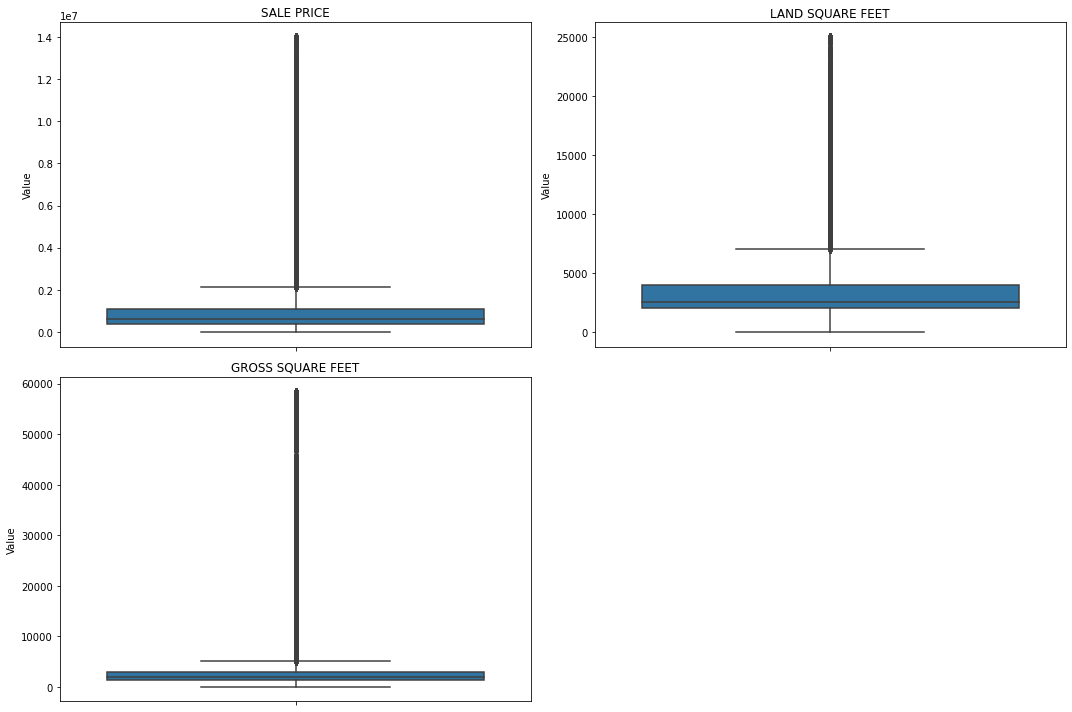

In [55]:
# Cap values at the 99th percentile for the specified columns using conditional indexing
for column in ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']:
    percentile_99 = df[column].quantile(0.99)
    df.loc[df[column] > percentile_99, column] = percentile_99

# Plot boxplots again to visualize the change
plt.figure(figsize=(15, 10))

for idx, column in enumerate(['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(y=df[column].dropna())
    plt.title(column)
    plt.ylabel('Value')
    plt.tight_layout()

plt.show()
 

In [56]:
# Check unique values and their frequencies for selected categorical columns
categorical_columns_info = {}
for column in ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT']:
    categorical_columns_info[column] = df[column].value_counts()

categorical_columns_info


{'NEIGHBORHOOD': FLUSHING-NORTH              3068
 UPPER EAST SIDE (59-79)     1736
 UPPER EAST SIDE (79-96)     1590
 UPPER WEST SIDE (59-79)     1439
 BEDFORD STUYVESANT          1436
                             ... 
 FRESH KILLS                    2
 BRONX PARK                     1
 PELHAM BAY                     1
 EAST RIVER                     1
 CITY ISLAND-PELHAM STRIP       1
 Name: NEIGHBORHOOD, Length: 254, dtype: int64,
 'BUILDING CLASS CATEGORY': 01 ONE FAMILY DWELLINGS                         18235
 02 TWO FAMILY DWELLINGS                         15828
 13 CONDOS - ELEVATOR APARTMENTS                 12989
 10 COOPS - ELEVATOR APARTMENTS                  12902
 03 THREE FAMILY DWELLINGS                        4384
 07 RENTALS - WALKUP APARTMENTS                   3466
 09 COOPS - WALKUP APARTMENTS                     2767
 04 TAX CLASS 1 CONDOS                            1656
 44 CONDO PARKING                                 1441
 15 CONDOS - 2-10 UNIT RESIDENTIAL      

In [58]:
# 1. Group rare categories in 'NEIGHBORHOOD' and 'BUILDING CLASS CATEGORY' under 'Other'
threshold = 50  # Any category with occurrences below this threshold will be labeled as 'Other'

for column in ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']:
    value_counts = df[column].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_categories else x)

# 2. Replace blank entries in 'TAX CLASS AT PRESENT' with 'Undefined'
df['TAX CLASS AT PRESENT'].replace(' ', 'Undefined', inplace=True)

# Check the updated value counts for the three columns
updated_categorical_info = {}
for column in ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT']:
    updated_categorical_info[column] = df[column].value_counts()

updated_categorical_info


{'NEIGHBORHOOD': FLUSHING-NORTH              3068
 UPPER EAST SIDE (59-79)     1736
 UPPER EAST SIDE (79-96)     1590
 UPPER WEST SIDE (59-79)     1439
 BEDFORD STUYVESANT          1436
                             ... 
 ROSSVILLE-CHARLESTON          62
 SILVER LAKE                   62
 TODT HILL                     58
 TOMPKINSVILLE                 55
 UPPER EAST SIDE (96-110)      55
 Name: NEIGHBORHOOD, Length: 226, dtype: int64,
 'BUILDING CLASS CATEGORY': 01 ONE FAMILY DWELLINGS                        18235
 02 TWO FAMILY DWELLINGS                        15828
 13 CONDOS - ELEVATOR APARTMENTS                12989
 10 COOPS - ELEVATOR APARTMENTS                 12902
 03 THREE FAMILY DWELLINGS                       4384
 07 RENTALS - WALKUP APARTMENTS                  3466
 09 COOPS - WALKUP APARTMENTS                    2767
 04 TAX CLASS 1 CONDOS                           1656
 44 CONDO PARKING                                1441
 15 CONDOS - 2-10 UNIT RESIDENTIAL               

In [60]:
# Extract year, month, and day from 'SALE DATE'
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.month
df['SALE DAY'] = df['SALE DATE'].dt.day

# Drop the 'SALE DATE' column as we have extracted its components
df.drop('SALE DATE', axis=1, inplace=True)

df[['SALE YEAR', 'SALE MONTH', 'SALE DAY']].head()


,SALE YEAR,SALE MONTH,SALE DAY
0,2017,7,19
1,2016,12,14
2,2016,9,12
3,2016,9,23
4,2016,11,17


In [61]:
df

,N/O,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DAY
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017,7,19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016,12,14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016,9,12
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016,9,23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016,11,28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017,4,21
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017,5,7
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,...,7,25000.0,58406.2392,2001,4,K6,11693337.0,2016,12,21


In [62]:
# Derive the 'PROPERTY AGE' column
df['PROPERTY AGE'] = df['SALE YEAR'] - df['YEAR BUILT']

# Display the first few rows to confirm the addition
df[['SALE YEAR', 'YEAR BUILT', 'PROPERTY AGE']].head()

,SALE YEAR,YEAR BUILT,PROPERTY AGE
0,2017,1900,117
1,2016,1900,116
2,2016,1900,116
3,2016,1913,103
4,2016,1900,116


In [63]:
df

,N/O,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DAY,PROPERTY AGE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,...,1633.0,6440.0,1900,2,C2,6625000.0,2017,7,19,117
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,...,4616.0,18690.0,1900,2,C7,NaN,2016,12,14,116
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,...,2212.0,7803.0,1900,2,C7,NaN,2016,9,12,116
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,...,2272.0,6794.0,1913,2,C4,3936272.0,2016,9,23,103
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,...,2369.0,4615.0,1900,2,C2,8000000.0,2016,11,17,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,...,2400.0,2575.0,1998,1,B9,450000.0,2016,11,28,18
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,...,2498.0,2377.0,1998,1,B9,550000.0,2017,4,21,19
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,...,4000.0,1496.0,1925,1,B2,460000.0,2017,5,7,92
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,...,25000.0,58406.2392,2001,4,K6,11693337.0,2016,12,21,15


In [68]:
# 1. Price per Square Foot
df['PRICE PER SQFT'] = df['SALE PRICE'] / df['GROSS SQUARE FEET']

In [69]:
# 2. Building Volume
df['BUILDING VOLUME'] = df['GROSS SQUARE FEET'] * df['TOTAL UNITS']

In [71]:
# 3. Is Renovated
# Assuming that properties older than 30 years which have had recent sales (e.g., in the last 5 years) are likely renovated
df['IS RENOVATED'] = np.where((df['PROPERTY AGE'] > 30) & (df['SALE YEAR'] > 2017), 1, 0)

In [73]:
# 4. Season
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df['SEASON'] = df['SALE MONTH'].map(seasons)

In [78]:
# 5. Tax Class Change
df['TAX CLASS CHANGE'] = np.where(df['TAX CLASS AT PRESENT'] == df['TAX CLASS AT TIME OF SALE'], 0, 1)

In [79]:
# 6. Building Size Category
bins = [0, 1000, 5000, 10000, 50000, np.inf]
labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']
filtered_gross_square_feet = df['GROSS SQUARE FEET'].dropna()
df.loc[filtered_gross_square_feet.index, 'BUILDING SIZE CATEGORY'] = pd.cut(filtered_gross_square_feet, bins=bins, labels=labels, right=False)

In [80]:
# Display the first few rows to check the new features
df[['PRICE PER SQFT', 'BUILDING VOLUME', 'IS RENOVATED', 'SEASON', 'TAX CLASS CHANGE', 'BUILDING SIZE CATEGORY']].head()

,PRICE PER SQFT,BUILDING VOLUME,IS RENOVATED,SEASON,TAX CLASS CHANGE,BUILDING SIZE CATEGORY
0,1028.726708,32200.0,0,Summer,1,Medium
1,NaN,579390.0,0,Winter,1,Large
2,NaN,132651.0,0,Fall,1,Medium
3,579.374742,67940.0,0,Fall,1,Medium
4,1733.47779,27690.0,0,Fall,1,Small


In [81]:
df

,N/O,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,SALE YEAR,SALE MONTH,SALE DAY,PROPERTY AGE,PRICE PER SQFT,BUILDING VOLUME,IS RENOVATED,SEASON,TAX CLASS CHANGE,BUILDING SIZE CATEGORY
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,...,2017,7,19,117,1028.726708,32200.0,0,Summer,1,Medium
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,...,2016,12,14,116,NaN,579390.0,0,Winter,1,Large
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,...,2016,9,12,116,NaN,132651.0,0,Fall,1,Medium
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,...,2016,9,23,103,579.374742,67940.0,0,Fall,1,Medium
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,...,2016,11,17,116,1733.47779,27690.0,0,Fall,1,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,...,2016,11,28,18,174.757282,5150.0,0,Fall,1,Small
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,...,2017,4,21,19,231.384098,4754.0,0,Spring,1,Small
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,...,2017,5,7,92,307.486631,2992.0,0,Spring,1,Small
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,...,2016,12,21,15,200.206984,408843.6744,0,Winter,1,Huge


In [82]:
# Saving the cleaned dataset after doing some feature engineering
# Save the DataFrame to a CSV file
df.to_csv('nyc-rolling-sales_new_cleaned_data.csv', index=False)